In [1]:
import numpy as np 
import matplotlib.pyplot as plt

#### 1.

Consider the Lagrangan interpolation of the function   $f(x) = \frac{1}{25x^{2}+1}$ for $n=6$, $n=8$, $n=10$, $n =12$ done in Exercise 1. Now, discretize the domain with $m =100$ equalli spaced points in the interval $[-1,1]$. Compute the Error-Norm-2, defined as

$$EN2 = \frac{1}{m}\sqrt{\sum_{i=1}^{m}\left(\frac{p(x)-f(x)}{f(x)}\right)^{2}}$$

for the cases $n = \{6,8,10,12\}$

**Solution**

First copy the function write in the before Exercise 

In [57]:
def L(xi,yi,x):
    n  = len(xi); nx = len(x)
    dx = xi     ; dy = yi
    La = [0.]*(nx)
    def b(j,xi):
        v = 1.0
        for k in range(n):
            if k != j:
                v *= (xi-dx[k])/(dx[j]-dx[k])
        return v
    for i,xi in enumerate(x):
        for j in range(n):
            La[i] +=dy[j]*b(j,xi)
    
    return np.array(La)

Consider the discretization and EN2

In [58]:
m=100
n=[6,8,10,12,14,16]
x = lambda n: np.linspace(-1,1,n)
f = lambda x: 1/(25*x**2 + 1)

Error = []
for i in n:
    xi = x(i)
    yi = f(xi)
    Error.append(np.sqrt(sum(((L(xi,yi,x(m))-f(x(m)))/f(x(m)))**2))/m)


Text(0,0.5,'Error')

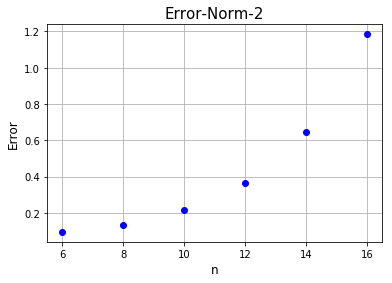

In [59]:
plt.plot(n,Error,"bo")
plt.grid(True)
plt.title("Error-Norm-2",fontsize="15")
plt.xlabel("n",fontsize="12")
plt.ylabel("Error",fontsize = "12")

#### 2.

Now discretize the same function with $m_{2}=50$ equally spaced points in the interval $[-1,1]$. Implement a routine that interpolates $f(x)$ piecewise linearly between these $m_{2}$ data points and evaluate EN2 at the $m=100$ points use above. Compare your result to the results of both exercises.



### Newton interpolation 

This method of interpoolation allow find the polynomial of interpolation with $(n+1)$ nodes $(x_{i},f_{i})$, where $i = 0,...,n$. We take the hypothesis that $P_{n}$ will can be write in the next form 

$P_{n}(x_{o}) = c_{o} = f_{o}$

$P_{n}(x_{1}) = c_{o} + c_{1}(x_{1}-x_{o}) = f_{1}$

$P_{n}(x_{2}) = c_{o} + c_{1}(x_{2}-x_{o}) + c_{2}(x_{2}-x_{o})(x_{n}-x_{1}) = f_{2}$

$\vdots$

$P_{n}(x_{2}) = c_{o} + c_{1}(x_{n}-x_{o})+\cdots + c_{n}(x_{n}-x_{o})(x_{n}-x_{1})\cdots (x-x_{n-1}) = f_{n}$





Now, we need solve the polynomial like a triangular system. Nevertheless the results are more elegant and easy if we consider additional conditions like a the grade of the polynomial is a "inductive" element 

### **algorithm**

**Input**

   Nodes $(x_{i},f_{i})$, where $i = 0,\cdots, n$
    
**Output**

   polynomial coefficients $P_{0,1,2,3,\cdots,n}: \quad c:=(c_{o},c_{1},\cdots,c_{n})$
    
---
for $i=0,\cdots,n$ do 

   $t_{i}:=f_{i}$
   
   for $k = (i-1)(-1),\cdots,0$ do 
       
   $t_{k} := \frac{t_{k+1}-t_{k}}{x_{i}-x_{k}}$
   
   $c_{i}:=t_{o}$
   
output --> $c:=(c_{o},c_{1},\cdots,c_{n})$

---
    


In [68]:
m2 = 50
x(m2)[0]

-1.0

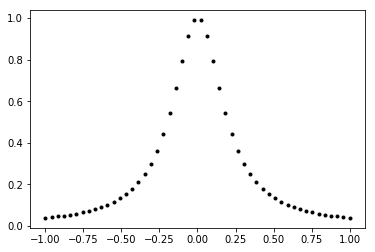

In [67]:
plt.plot(x(m2),f(x(m2)),"k.")

0.04081632653061229 -0.04


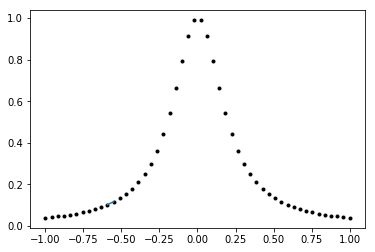

In [109]:
print(x(m2)[1]-x(m2)[0],(x(m2)[0]-x(m2)[-1])/len(x(m2)-1))


def y(xp):
    return f(x(m2)[10]) + ((f(x(m2)[11])-f(x(m2)[10]))/(x(m2)[11]-x(m2)[10]))*(xp-x(m2)[10])

plt.plot(x(m2),f(x(m2)),"k.")
plt.plot(xp,y(xp))

In [98]:
np.linspace(1,10,m2)

array([ 1.        ,  1.18367347,  1.36734694,  1.55102041,  1.73469388,
        1.91836735,  2.10204082,  2.28571429,  2.46938776,  2.65306122,
        2.83673469,  3.02040816,  3.20408163,  3.3877551 ,  3.57142857,
        3.75510204,  3.93877551,  4.12244898,  4.30612245,  4.48979592,
        4.67346939,  4.85714286,  5.04081633,  5.2244898 ,  5.40816327,
        5.59183673,  5.7755102 ,  5.95918367,  6.14285714,  6.32653061,
        6.51020408,  6.69387755,  6.87755102,  7.06122449,  7.24489796,
        7.42857143,  7.6122449 ,  7.79591837,  7.97959184,  8.16326531,
        8.34693878,  8.53061224,  8.71428571,  8.89795918,  9.08163265,
        9.26530612,  9.44897959,  9.63265306,  9.81632653, 10.        ])